In [1]:
import pandas as pd
import numpy as np
from numpy import nan as NaN
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [2]:
# Importing Files
covid_data = pd.read_excel("./DATA/data.xlsx")
covid_data.set_index("countriesAndTerritories", inplace=True);

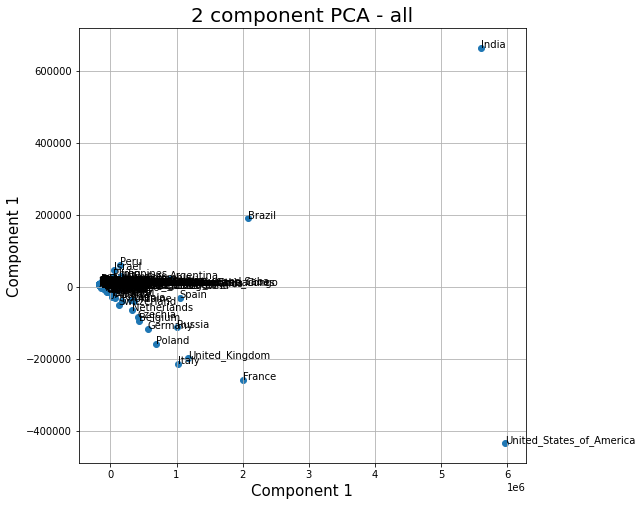

In [3]:
# PCA
components_number = 2;
pca = PCA(components_number)
pca = pca.fit_transform(covid_data)
pca=pd.DataFrame(data = pca, columns=["component_1", "component_2"])
countries = covid_data.index
x = pca["component_1"]
y = pca["component_2"]
fig = plt.figure(figsize=(8,8));
ax = fig.add_subplot(1,1,1);
ax.scatter(x,y)
ax.grid()
ax.set_xlabel("Component 1", fontsize=15)
ax.set_ylabel("Component 2", fontsize=15)
ax.set_title("2 component PCA - all", fontsize=20)
for i in range(len(countries)):
    ax.annotate(str(countries[i]), (x[i],y[i]))


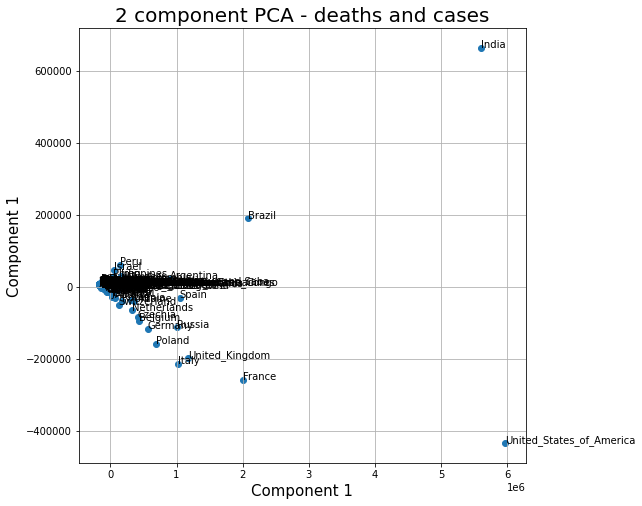

In [4]:
# PCA 2
components_number = 2;
pca2 = PCA(components_number)
covid_data_2 = covid_data[["cases from september", "deaths from september", "cases from october", "deaths from october"]]
pca2 = pca2.fit_transform(covid_data_2)
pca2 = pd.DataFrame(data = pca, columns=["component_1", "component_2"])
countries = covid_data.index
x2 = pca2["component_1"]
y2 = pca2["component_2"]
fig2 = plt.figure(figsize=(8,8));
ax2 = fig2.add_subplot(1,1,1);
ax2.scatter(x2,y2)
ax2.grid()
ax2.set_xlabel("Component 1", fontsize=15)
ax2.set_ylabel("Component 2", fontsize=15)
ax2.set_title("2 component PCA - deaths and cases", fontsize=20)
for i in range(len(countries)):
    ax2.annotate(str(countries[i]), (x2[i],y2[i]))

In [5]:
# Clustering
    # All
X1 = covid_data
clustering1 = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(X1)
print(clustering1.labels_)
    # Deaths and Cases
X2 = covid_data_2
clustering2 = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(X2)
print(clustering2.labels_)

[139 116 108 163 147 212 182 127 201 133 151 117 114 118 185 159 157 205
 195 154 192 173 197 207 178 111 121 161 148 130 199 208 184 191 166 211
 144 165 206 187 143 132 135 176 188 107 153  76 136 129 145 152 167 119
 189 196 183 171  71  58  91 156 198 137 174  86 186 149 125 175 203 204
 122 172 168 126 160 141 164 193  53 120 210 190 103 110  92  75 106 113
 115 112  55  82  60 123 169 155 146 142 170 158  57  95 134  70 177  87
 181 138 140 162 128  83 109  78  69  34 209  72  54  80 104 105 179 180
  45  51  62  97  89  35 131  63  64  56 101  67  37 124  65 150 200  94
  68  79  26  61  52  33  99  81  73  31 194  59  28  74  27 202 102  96
  84  29  25 100  77  98  48  66  93  39  40  32  12  49  85  46  22  88
  47  36  41  90  23  19  38  50  43  42  24  44  30  17  20  16  13  21
  18  11   9  14  15  10   6   5   8   7   2   4   3   1   0]
[122 211 108 145 114 212 195 119 179 129 123 155 201 120 137 196 187 169
 181 130 148 193 190 121 184 133 125 159 180 206 209 153 191 2

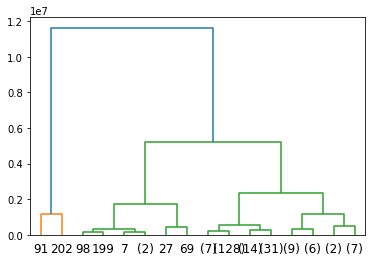

In [6]:
# Dendograms

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(clustering1, truncate_mode='level', p=4)

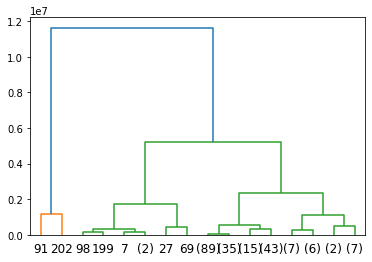

In [7]:
plot_dendrogram(clustering2, truncate_mode='level', p=4)
# Estimated number of clusters = 8

In [8]:
# Clustering
    # All
X1 = covid_data
clustering1 = AgglomerativeClustering(distance_threshold=None, n_clusters=8).fit(X1)
clusters1 = pd.DataFrame(data=clustering1.labels_, columns=["cluster"])
clusters1.set_index(countries, inplace=True)
X1 = X1.join(pd.DataFrame(clusters1))
X1_mean = X1.groupby("cluster")
X1_mean = X1_mean.mean(numeric_only=True)

    # Deaths and Cases
X2 = covid_data_2
clustering2 = AgglomerativeClustering(distance_threshold=None, n_clusters=8).fit(X2)
clusters2 = pd.DataFrame(data=clustering2.labels_, columns=["cluster"])
clusters2.set_index(countries, inplace=True)
X2 = X2.join(pd.DataFrame(clusters2))
X2_mean = X2.groupby("cluster")
X2_mean = X2_mean.mean(numeric_only=True)

    # Global mean
covid_data_mean = covid_data.mean(skipna=True, numeric_only=True)

Text(0.5, 1.0, '2 component PCA - all')

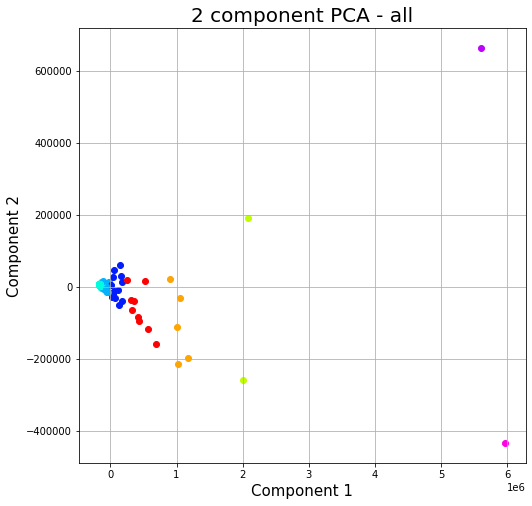

In [14]:
z = clusters1.reset_index(0)
z = z["cluster"]
fig3 = plt.figure(figsize=(8,8));
ax3 = fig3.add_subplot(1,1,1);

for j in range(len(z)):
    if z[j] == 0:
        color = '#fc0303'
    elif z[j] == 1:
        color = '#fca503'
    elif z[j] == 2:
        color = '#c2fc03'
    elif z[j] == 3:
        color = '#03fcdb'
    elif z[j] == 4:
        color = '#03b1fc'
    elif z[j] == 5:
        color = '#031cfc'
    elif z[j] == 6:
        color = '#be03fc'
    elif z[j] == 7:
        color = '#fc03e3'
    ax3.scatter(x[j], y[j], c=color)

ax3.grid()
ax3.set_xlabel("Component 1", fontsize=15)
ax3.set_ylabel("Component 2", fontsize=15)
ax3.set_title("2 component PCA - all", fontsize=20)

Text(0.5, 1.0, '2 component PCA - deaths and cases')

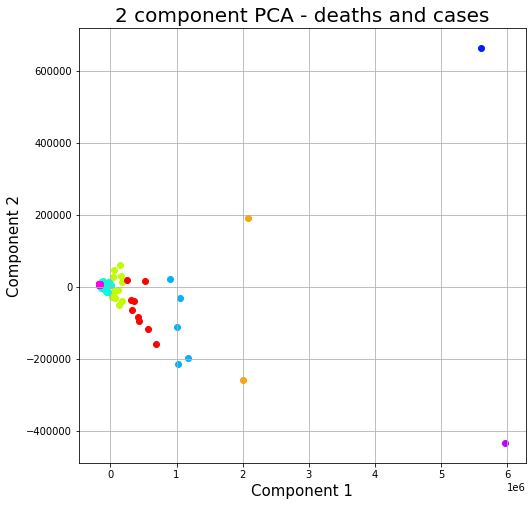

In [16]:
z2 = clusters2.reset_index(0)
z2 = z2["cluster"]
fig4= plt.figure(figsize=(8,8));
ax4 = fig4.add_subplot(1,1,1);

for j in range(len(z)):
    if z2[j] == 0:
        color = '#fc0303'
    elif z2[j] == 1:
        color = '#fca503'
    elif z2[j] == 2:
        color = '#c2fc03'
    elif z2[j] == 3:
        color = '#03fcdb'
    elif z2[j] == 4:
        color = '#03b1fc'
    elif z2[j] == 5:
        color = '#031cfc'
    elif z2[j] == 6:
        color = '#be03fc'
    elif z2[j] == 7:
        color = '#fc03e3'
    ax4.scatter(x2[j], y2[j], c=color)

ax4.grid()
ax4.set_xlabel("Component 1", fontsize=15)
ax4.set_ylabel("Component 2", fontsize=15)
ax4.set_title("2 component PCA - deaths and cases", fontsize=20)